In [2]:
# Run this cell!
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('default')

import warnings
warnings.simplefilter('ignore', FutureWarning)

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

*Note: This analysis was conducted entirely in the `datascience` Python library specifically designed for Data 8. See the documentation for the library [here](http://data8.org/datascience/).*

# Introduction

As a part of Director Jill Finlayson's Data Discovery team, our research focus centered around analyzing graduate student data to inform data-driven policies that will address gaps in diversity and inclusion efforts within UC Berkeley’s engineering graduate programs. In our initial conversations with College of Engineering faculty we identified three main dimensions of diversity and inclusion to inform our research: differences in academic performance by students' previous background (i.e. previous institution type, undergraduate major, location, etc.), race/underrepresented status, and other socioeconomic factors (i.e. gender, first-generation college student status, transfer student status, etc.). The attributes of interest for each dimension vary dimension-to-dimension, but broadly are centered around graduate student persistence or retention rates among students pursuing Masters and Doctoral degrees. More specifically, this research focuses on investigating UC Berkeley's College of Engineering Graduate Programs' commitment to promoting greater access to quality higher education programs.

As mentioned previously, the two main program types of interest were Masters programs and Doctoral programs within UC Berkeley's College of Engineering. While the requirements for each vary by department, generally, Doctoral programs (PhD programs) feature two main "sticking" points or main points of attrition after students' first and third years when they are required to take a qualifying exam. The second qualifying exam may be taken after a students' second year--after which they will no longer be required to pay tuition. While Doctoral students are enrolled in UC Berkeley's College of Engineering, they may not always be required to enroll in courses since a large portion of their time at the University is spent conducting research and completing/publishing their thesis. Per the [Time to Doctorate Dashboard presented by UCOP](https://www.universityofcalifornia.edu/infocenter/time-to-doctorate), the average time to degree for UC Berkeley Doctoral students in Engineering and CS was ~5.6 years. On the other hand, Masters students will spend their entire academic career within UC Berkeley's College of Engineering enrolling in classes. More recently, 4+1 Masters programs have become increasingly popular on campus--which offer UC Berkeley undergraduate students the change to take another year of classes to earn a Masters degree alongside their Bachelor's degree(s).

## Berkeley as a Public Institution
As a Public Institution, UC Berkeley has a responsibility to serve the incredibly diverse student body of California. In light of Forbes ranking UC Berkeley (and the University of California system as a whole) as the nation's best University, it is especially important to further investigate whether the undergraduate accessibility and affordability metrics highlighted by Forbes hold true for College of Engineering Graduate Programs--specifically looking at accessibility for California residents/UC or CSU students. Yet efforts to determine whether a discrepancy exists between the UC Berkeley's College of Engineering's commitment to promoting access to quality higher education do not stop at admissions rates. It is imperative to consider student outcomes post-admittance to identify any hidden, unintended disparities that may exist within UC Berkeley's College of Engineering Graduate Programs.

## Data
The following dataset will be act as the cornerstone of our analysis:

In [3]:
graduate_admissions_data = Table().read_table('2007-2021 Graduate Admissions Data.csv')
graduate_admissions_data

ppsk,count,sir.current.flag,first.generation.college.1,term.entry,year.entry,gender,ethnic.l1,ethnic.l2,ethnic.l3,program.division,program.department,program.major,previous.school.name,previous.school.major.name,previous.school.degree.type,previous.school.graduation.date,previous.school.type
70148,1,Y,U,Fall,2013,Female,Asian,Asian,Japanese,Clg of Engineering,Bioengineering,Translational Medicine,Baylor University,Medicine,Master's degree or equivalent,5/1/1995 0:00,"4-Yr Clg/Univ, Excl UC/CSU"
70148,1,Y,U,Fall,2013,Female,Asian,Asian,Japanese,Clg of Engineering,Bioengineering,Translational Medicine,UC Berkeley,Physiology,Bachelor's degree or equivalent,5/1/1990 0:00,University of Calif Campus
nan,1,Y,U,Spring,2008,Male,White/Other,White,White,Haas School of Business,Business,Financial Engineering,UC Berkeley,nan,Bachelor's degree or equivalent,12/1/1990 0:00,University of Calif Campus
67711,1,Y,N,Fall,2013,Female,White/Other,White,White,Grad School of Education,Education,Teacher Education,College Of Alameda,Breadth Requirements: Science,-,nan,California Community College
67711,1,Y,N,Fall,2013,Female,White/Other,White,White,Grad School of Education,Education,Teacher Education,Samuel Merritt University,Electives: Art Horticulture,-,nan,"4-Yr Clg/Univ, Excl UC/CSU"
67711,1,Y,N,Fall,2013,Female,White/Other,White,White,Grad School of Education,Education,Teacher Education,UC Berkeley,American Studies,Bachelor's degree or equivalent,5/1/2013 0:00,University of Calif Campus
67711,1,Y,N,Fall,2013,Female,White/Other,White,White,Grad School of Education,Education,Teacher Education,Vista College,Breadth Requirements: English Math,-,nan,Other Institution
73593,1,Y,U,Fall,2016,Male,White/Other,White,White,Goldman School Public Policy,Public Policy,Public Affairs,Pomona College,Philosophy,Bachelor's degree or equivalent,5/1/1984 0:00,"4-Yr Clg/Univ, Excl UC/CSU"
73593,1,Y,U,Fall,2016,Male,White/Other,White,White,Goldman School Public Policy,Public Policy,Public Affairs,UC Berkeley,Landscape Architecture,Master's degree or equivalent,12/1/1989 0:00,University of Calif Campus
42990,1,Y,N,Fall,2008,Female,White/Other,White,White,Grad School of Education,Education,Education,Holy Names University,Culture and Creation Spirituality,Master's degree or equivalent,5/1/1995 0:00,"4-Yr Clg/Univ, Excl UC/CSU"


The dataset displayed above includes information on all graduate students who SIR'ed to UC Berkeley College of Engineering programs froom 2007-2021 (note that this is *distinct from students who were admitted to UC Berkeley College of Engineering graduate programs*). The dataset contains the unique identifier for each student (`ppsk`), first generation college student status (`first.generation.college.1`), entry term (`term.entry`), entry year (`year.entry`), gender (restricted to either Male or Female), ethnicity/racial idenitification (`ethnic.l1`, `ethnic.l2`, and `ethnic.l3`), the school under which the student's major is housed (`program.division`), the department under which the student's major is housed (`program.department`), the student's major program (`program.major`), any previous school they attended (`previous.school.name`), undergrad major/previous majors (`previous.school.major.name`), the type of degree they previously earned (`previous.school.degree.type`), previous graduation date (`previous.school.graduation.date`), and the school type of the student's previous institution (`previous.school.type`).
<br> *__Note: Some students appear multiple times in the dataset because they either attended more than one previous institution or have earned more than one previous degree.__*

For a more specific definition of the differences between `ethnic.l1`, `ethnic.l2`, and `ethnic.l3`, see the data dictionary linked [here](https://docs.google.com/spreadsheets/d/1aesYj2trVrmO_K3JxUhDl4_HkofbaBL0_eZ5GY3UlOw/edit?usp=sharing).

The dataset above will be filtered to isolate College of Engineering students only:

In [4]:
engineering_admissions_data = graduate_admissions_data.where('program.division', 'Clg of Engineering')
engineering_admissions_data

ppsk,count,sir.current.flag,first.generation.college.1,term.entry,year.entry,gender,ethnic.l1,ethnic.l2,ethnic.l3,program.division,program.department,program.major,previous.school.name,previous.school.major.name,previous.school.degree.type,previous.school.graduation.date,previous.school.type
70148,1,Y,U,Fall,2013,Female,Asian,Asian,Japanese,Clg of Engineering,Bioengineering,Translational Medicine,Baylor University,Medicine,Master's degree or equivalent,5/1/1995 0:00,"4-Yr Clg/Univ, Excl UC/CSU"
70148,1,Y,U,Fall,2013,Female,Asian,Asian,Japanese,Clg of Engineering,Bioengineering,Translational Medicine,UC Berkeley,Physiology,Bachelor's degree or equivalent,5/1/1990 0:00,University of Calif Campus
126125,1,Y,Y,Spring,2009,Male,Asian,Asian,Chinese,Clg of Engineering,Materials Science & Eng,Materials Science & Eng,CSU East Bay,Master of Business Administration,Master's degree or equivalent,6/1/2005 0:00,Calif State University Campus
126125,1,Y,Y,Spring,2009,Male,Asian,Asian,Chinese,Clg of Engineering,Materials Science & Eng,Materials Science & Eng,Chabot College,None,Other degree,nan,California Community College
126125,1,Y,Y,Spring,2009,Male,Asian,Asian,Chinese,Clg of Engineering,Materials Science & Eng,Materials Science & Eng,Laney College,concurrent with high school,Other degree,nan,California Community College
126125,1,Y,Y,Spring,2009,Male,Asian,Asian,Chinese,Clg of Engineering,Materials Science & Eng,Materials Science & Eng,UC Berkeley,Triple Major: ME / MSE / MCB,Bachelor's degree or equivalent,5/1/1995 0:00,University of Calif Campus
126125,1,Y,Y,Spring,2009,Male,Asian,Asian,Chinese,Clg of Engineering,Materials Science & Eng,Materials Science & Eng,UC San Diego,Withdraw: Incomplete No degree,Other degree,nan,University of Calif Campus
126125,1,Y,Y,Spring,2009,Male,Asian,Asian,Chinese,Clg of Engineering,Materials Science & Eng,Materials Science & Eng,"University of California, Hastings College of Law",Law - JD,Professional degree,5/1/2008 0:00,Other Institution
209709,1,Y,U,Fall,2016,Male,White/Other,Decline to State,Decline to State,Clg of Engineering,Industrial Eng & Ops Research,Industrial Eng & Ops Rsch,UC Berkeley,Chemical Engineering,Bachelor's degree or equivalent,8/1/1996 0:00,University of Calif Campus
209709,1,Y,U,Fall,2016,Male,White/Other,Decline to State,Decline to State,Clg of Engineering,Industrial Eng & Ops Research,Industrial Eng & Ops Rsch,UC Berkeley,Masters of Business Administration,Master's degree or equivalent,5/1/2010 0:00,University of Calif Campus


The tags for this dataset are identical to the table `graduate_admissions_data` provided above.

We also will be creating a set of dictionaries for ease of access in our analysis:

In [5]:
# Ease of access tag dictionaries
tags_dict = {'CSU': 'Calif State University Campus',
             'CCC': 'California Community College',
             'UC': 'University of Calif Campus'}
UC_dict = {'UCB': 'UC Berkeley',
           'UCLA': 'UC Los Angeles (UCLA)',
           'UCSD': 'UC San Diego',
           'UCD': 'UC Davis',
           'UCI': 'UC Irvine',
           'UCSB': 'UC Santa Barbara',
           'UCR': 'UC Riverside',
           'UCSF': 'UC San Francisco',
           'UCM': 'UC Merced',
           'UCBX': 'UC Berkeley Extended',
           'UCIX': 'UC Irvine Extended'}
CSU_dict = {'SLO': 'Cal Poly San Luis Obispo',
            'SJSU': 'San Jose State University',
            'SFSU': 'San Francisco State University',
            'Pomona': 'Cal Poly Pomona',
            'SDSU': 'San Diego State Univeristy',
            'CSUF': 'CSU Fullerton',
            'CSUEB': 'CSU East Bay',
            'CSUFr': 'CSU Fresno',
            'CSU Sac': 'CSU Sacramento',
            'HSU': 'Humboldt State University',
            'CSULB': 'CSU Long Beach',
            'CSUN': 'CSU Northridge',
            'Sonoma': 'Sonoma State University',
            'CSULA': 'CSU Los Angeles',
            'Chico': 'CSU Chico',
            'CSUB': 'CSU Bakersfield',
            'CSUDH': 'CSU Dominguez Hills',
            'CSUSM': 'CSU San Marcos',
            'CSUS': 'CSU Stanislaus'}

The `engineering_admissions_data` dataset will also be filtered to isolate values with a Bachelor's degree. This will remove any duplicate data points for students who may have gone to more than one institution or who may have earned more than one degree. This new, filtered dataset is `engineering_admissions_data_ug`. Using the `tags_dict` created above, we now will filter `engineering_admissions_data_ug` into four distinct datasets for students who went to UCs, CSUs, CCCs, or other four-year institutions for their Bachelor's degree (or for CCCs, who attended a CCC as a part of their undergraduate career).

In [6]:
engineering_admissions_data_ug = (engineering_admissions_data.where('previous.school.degree.type',
                                                                    "Bachelor's degree or equivalent")
                                 )
UC_data = engineering_admissions_data_ug.where('previous.school.type', tags_dict['UC'])
CSU_data = engineering_admissions_data_ug.where('previous.school.type', tags_dict['CSU'])
non_UC_or_CSU_data = engineering_admissions_data_ug.where('previous.school.type', '4-Yr Clg/Univ, Excl UC/CSU')

To help investigate the quality of UC Berkeley College of Engineering programs, it will be necessary to consider students who graduated:

In [7]:
COE_degrees = Table().read_table('Combined Graduate Degrees.csv').where('degree.college', 'Clg of Engineering')
COE_degrees

ppsk,degree.level,degree.college,degree.division,degree.department,degree.major,gpa.cum.degree,term.degree,year.degree,academic.year.degree,count,enrolled.semesters
70190,Doctoral,Clg of Engineering,Clg of Engineering,Mechanical Engineering,Mechanical Engineering,nan,Spring,1999,1998-99,1,nan
70190,Masters,Clg of Engineering,Clg of Engineering,Mechanical Engineering,Mechanical Engineering,nan,Fall,1993,1993-94,1,nan
70199,Masters,Clg of Engineering,Clg of Engineering,Mechanical Engineering,Mechanical Engineering,nan,Spring,1992,1991-92,1,nan
70201,Doctoral,Clg of Engineering,Clg of Engineering,Mechanical Engineering,Mechanical Engineering,3.354,Spring,2002,2001-02,1,nan
70287,Masters,Clg of Engineering,Clg of Engineering,Electrical Eng & Computer Sci,Electrical Eng & Comp Sci,nan,Spring,1993,1992-93,1,nan
54670,Doctoral,Clg of Engineering,Clg of Engineering,Nuclear Engineering,Nuclear Engineering,nan,Fall,1995,1995-96,1,nan
69748,Masters,Clg of Engineering,Clg of Engineering,Electrical Eng & Computer Sci,Electrical Eng & Comp Sci,nan,Fall,1992,1992-93,1,nan
69699,Masters,Clg of Engineering,Clg of Engineering,Mechanical Engineering,Naval Architecture,nan,Fall,1993,1993-94,1,nan
69711,Masters,Clg of Engineering,Clg of Engineering,Civil & Environmental Eng,Civil Engineering,nan,Spring,1991,1990-91,1,nan
69592,Masters,Clg of Engineering,Clg of Engineering,Electrical Eng & Computer Sci,Electrical Eng & Comp Sci,nan,Spring,1993,1992-93,1,nan


The above dataset provides data on all graduate degrees (Masters and Doctoral) given from 1989-2016. The tags for this dataset are nearly identical to those of `graduate_admissions_data`. This dataset also includes the type of degree earned by each student (`degree.level`), the student's cumulative GPA if it is available (`gpa.cum.degree`), the term in which the student earned their degree (`term.degree`), and the year in which the student earned their degree (`year.degree`). The other tags are irrelevant for the analyses conducted here.
<br> *__Note: Some students earned both a Masters and Doctoral degree from UC Berkeley and thus will appear multiple times in this dataset. Also, the `degree.level` tag designates the type of degree earned by the student which may differ from what the student entered as.__*

The final group of datasets that will be required are student census datasets:

In [8]:
# Function that generates a table from student census data that isolates grad students in the Fall term
def grad_fall(census_data):
    '''Given a census data table, will return a table identical to census_data that has been
    isolated to only show graduate students in the Fall term of the given dataset.
    '''
    grad_census_data = census_data.where('education.level', are.above(4))
    grad_fall_census_data = grad_census_data.where('term', 'Fall')
    return grad_fall_census_data

census_2008 = grad_fall(Table().read_table('2008 Student Census.csv'))
census_2009 = grad_fall(Table().read_table('2009 Student Census.csv'))
census_2010 = grad_fall(Table().read_table('2010 Student Census.csv'))
census_2011 = grad_fall(Table().read_table('2011 Student Census.csv'))
census_2012 = grad_fall(Table().read_table('2012 Student Census.csv'))
census_2013 = grad_fall(Table().read_table('2013 Student Census.csv'))
census_2014 = grad_fall(Table().read_table('2014 Student Census.csv'))
census_2015 = grad_fall(Table().read_table('2015 Student Census.csv'))
census_2016 = grad_fall(Table().read_table('2016 Student Census.csv'))
census_2017 = grad_fall(Table().read_table('2017 Student Census.csv'))
census_2018 = grad_fall(Table().read_table('2018 Student Census.csv'))
census_2019 = grad_fall(Table().read_table('2019 Student Census.csv'))
census_2020 = grad_fall(Table().read_table('2020 Student Census.csv'))

# Here is an example of just one of these datasets:
census_2008

C:\Users\caleb\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


ppsk,year,term,undergrad.code,entry,education.level,education.level.non.exam,registration.eligibility.status,gpa.cum,units.total,units.transfer,units.exam
70297,2008,Fall,G,NEW FRESHMEN,6,6,C,4,128,0,0
68383,2008,Fall,G,NEW FRESHMEN,8,8,C,3.974,142.5,0,0
68401,2008,Fall,G,NEW FRESHMEN,5,5,C,3.923,30,0,0
68760,2008,Fall,G,NEW FRESHMEN,6,6,C,3.89,142,0,0
68366,2008,Fall,G,NEW FRESHMEN,5,5,C,3.229,14,0,0
679438,2008,Fall,G,nan,6,6,C,3.982,84,0,0
72419,2008,Fall,G,nan,7,7,C,3.602,91,0,0
42990,2008,Fall,G,ADVANCED STANDING,5,5,N,4,10,0,0
65707,2008,Fall,G,ADVANCED STANDING,5,5,N,4,6,0,0
75328,2008,Fall,G,NEW FRESHMEN,5,5,N,0,0,0,0


The above example of a census data dataset provides information on students enrolled in Fall 2008. The other datasets initialized above have identical data for the Fall term of the year specified in their name. The `ppsk` tag provides the student's unique identifier and the `education.level` tag indicates the student's status. An `education.level` tag of 5 indicates the student is currently enrolled in a Masters degree program while a tag of 6, 7, or 8 indicates that the student is in a Doctoral degree program. The remaining tags are irrelevant for this analysis.

We will use the dictionary `student_type_dict` to store the `education.level` tags for each student:

In [9]:
census_data_list = [census_2008, census_2009, census_2010, census_2011,
                    census_2012, census_2013, census_2014, census_2015,
                    census_2016, census_2017, census_2018, census_2019,
                    census_2020]

student_type_dict = {}
for census_data in census_data_list:
    index = 0
    ppsk_column = census_data.where('education.level', are.above(4)).column(0)
    education_level_column = census_data.column('education.level')
    for ppsk in ppsk_column:
        student_type_dict[ppsk] = education_level_column[index]
        index += 1

It is also important to note that some students will enter as one type of student but will receive a different degree. Generally, this is more common among Doctoral students who will switch to a Masters program while working towards their PhD. To account for this, it is necessary to construct a dictionary `degree_earned_dict` which stores the type of degree earned by each student (either a Masters degree, a Doctoral degree, or both):
<br> *Note: The dataset `COE_degrees` includes data on the type of degree earned by students who graduated with a graduate degree (Masters or Doctoral degree) from the College of Engineering from 1989-2016*

In [10]:
COE_degrees = Table().read_table('Combined Graduate Degrees.csv').where('degree.college', 'Clg of Engineering')

degree_earned_dict = {}
both_list = list(COE_degrees.group('ppsk').where('count', are.above(1)).column('ppsk'))
for ppsk in both_list:
    degree_earned_dict[ppsk] = 'Both'
degree_by_ppsk_list = COE_degrees.group(['ppsk', 'degree.level']).column('ppsk')
degree_level_list = COE_degrees.group(['ppsk', 'degree.level']).column('degree.level')
index = 0
for ppsk in degree_by_ppsk_list:
    degree_earned_dict[ppsk] = degree_earned_dict.get(ppsk, degree_level_list[index])
    index += 1

C:\Users\caleb\anaconda3\lib\site-packages\datascience\tables.py:920: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  values = np.array(tuple(values))


## Research Question
As alluded to previously, the main questions of this investigation are:
* How successful are College of Engineering graduate programs in promoting greater access to higher education?
* How equitable is student performance across undergraduate institution type in both Masters and Doctoral degree programs?

Where the three main undergraduate institution types looked at here being: UCs, CSUs, and more broadly other four-year institutions--an umbrella term comprised of in- and out-of-state private institutions and out-of-state public institutions.

# Methods

## Investigating the Expansion of Greater Access to College of Engineering Graduate Programs

The initial focus of this analysis will focus on the degree to which the College of Engineering promotes greater access to higher education (specifically Masters and PhD programs). Given the `engineering_admissions_data` dataset, we will look at SIR rates for students from different previous institution types. These groups--namely UC students, CSU students, CCC students, and other four-year institution students--are designated by students' past educational experience. Any student who earned multiple degrees will appear in the dataset multiple times (once for each institution type that they attended in the past). For instance, a student who attended a California Community College (CCC) for two years before transferring to a UC campus for their Bachelor's degree who then went on to earn a Masters degree from an out-of-state institution would be tagged as a CCC student, a UC student, and as an other four-year institution student. The following code cell will define a function `create_counts_table` that will display the number of students for a certain previous institution type across all years for which data exists (generally from 2007-2020).

In [11]:
# Defines a create_counts_table function that displays the number of students for a certain school type
# across all years for which data exists (excluding 2021)
def create_counts_table(table):
    """
    Creates a table that displays the number of students from each dataset 
    table for each year that data exists
    """
    return table.group('year.entry').relabel(0, 'Year').relabel(1, 'Students Admitted')

# Creating datasets that will be used to generate Figure 1
UC_students_per_year = create_counts_table(UC_data).take(range(14))
CSU_students_per_year = create_counts_table(CSU_data)
non_UC_or_CSU_per_year = create_counts_table(non_UC_or_CSU_data).take(range(14))

# Creating datasets that will be used to generate Figures 1.1 and 1.2
unique_ppsks_in_engineering_admissions_data = engineering_admissions_data.group('ppsk')
ppsks_to_look_at = list(unique_ppsks_in_engineering_admissions_data.column('ppsk'))
education_level_arr = make_array()
for ppsk in ppsks_to_look_at:
    education_level_flag = student_type_dict.get(ppsk, 0)
    education_level_arr = np.append(education_level_arr, education_level_flag)
unique_ppsks_in_engineering_admissions_data = (unique_ppsks_in_engineering_admissions_data
                                               .with_column('education.level', education_level_arr)
                                              )
engineering_admissions_data_w_flags = (engineering_admissions_data
                                                       .join('ppsk', unique_ppsks_in_engineering_admissions_data)
                                      )
engineering_admissions_data_ug_W_flags = (engineering_admissions_data_w_flags
                                          .where('previous.school.degree.type',
                                                 "Bachelor's degree or equivalent")
                                         )
UC_data_w_flags = engineering_admissions_data_ug_W_flags.where('previous.school.type', tags_dict['UC'])
CSU_data_w_flags = engineering_admissions_data_ug_W_flags.where('previous.school.type', tags_dict['CSU'])
non_UC_or_CSU_data_w_flags = engineering_admissions_data_ug_W_flags.where('previous.school.type', '4-Yr Clg/Univ, Excl UC/CSU')
UC_Masters_data = UC_data_w_flags.where('education.level', 5)
CSU_Masters_data = CSU_data_w_flags.where('education.level', 5)
non_UC_or_CSU_Masters_data = non_UC_or_CSU_data_w_flags.where('education.level', 5)
UC_PhDs_data = UC_data_w_flags.where('education.level', are.above(5))
CSU_PhDs_data = CSU_data_w_flags.where('education.level', are.above(5))
non_UC_or_CSU_PhDs_data = non_UC_or_CSU_data_w_flags.where('education.level', are.above(5))

UC_Masters_per_year = create_counts_table(UC_Masters_data).take(range(14))
CSU_Masters_per_year = create_counts_table(CSU_Masters_data).take(range(14))
non_UC_or_CSU_Masters_per_year = create_counts_table(non_UC_or_CSU_Masters_data).take(range(14))

UC_PhDs_per_year = create_counts_table(UC_PhDs_data).take(range(14))
CSU_PhDs_per_year = create_counts_table(CSU_PhDs_data).take(range(14))
non_UC_or_CSU_PhDs_per_year = create_counts_table(non_UC_or_CSU_PhDs_data).take(range(14))

In [12]:
UC_Masters_data.join('ppsk', COE_degrees).num_rows / UC_Masters_data.num_rows

0.4245125348189415

In [13]:
CSU_Masters_data.join('ppsk', COE_degrees).num_rows / CSU_Masters_data.num_rows

0.47126436781609193

In [14]:
non_UC_or_CSU_Masters_data.join('ppsk', COE_degrees).num_rows / non_UC_or_CSU_Masters_data.num_rows

0.3794266441821248

In [15]:
UC_PhDs_data.join('ppsk', COE_degrees).num_rows / UC_PhDs_data.num_rows

0.5323076923076923

In [16]:
CSU_PhDs_data.join('ppsk', COE_degrees).num_rows / CSU_PhDs_data.num_rows

0.5348837209302325

In [17]:
non_UC_or_CSU_PhDs_data.join('ppsk', COE_degrees).num_rows / non_UC_or_CSU_PhDs_data.num_rows

0.49702541914548404

A summary of the nine tables defined in the above code cell is provided below:
<br>
* `UC_students_per_year` - A two-column table containing the number of SIRed students who previously attended a UC for each year from 2007-2020
* `CSU_students_per_year` - A two-column table containing the number of SIRed students who previously attended a CSU for each year from 2007-2020
* `non_UC_or_CSU_per_year` - A two-column table containing the number of SIRed students who previously attended some other four-year institution for each year from 2007-2020
* `UC_Masters_per_year` - A two-column table containing the number of SIRed Masters students who previously attended a UC for each year from 2007-2020
* `CSU_Masters_per_year` - A two-column table containing the number of SIRed Masters students who previously attended a CSU for each year from 2007-2020
* `non_UC_or_CSU_Masters_per_year` - A two-column table containing the number of SIRed Masters students who previously attended some other four-year institution for each year from 2007-2020
* `UC_PhDs_per_year` - A two-column table containing the number of SIRed Doctoral students who previously attended a UC for each year from 2007-2020
* `CSU_PhDs_per_year` - A two-column table containing the number of SIRed Doctoral students who previously attended a CSU for each year from 2007-2020
* `non_UC_or_CSU_PhDs_per_year` - A two-column table containing the number of SIRed Doctoral students who previously attended some other four-year institution for each year from 2007-2020

These tables will be used to generate a visualization of the number of students who SIRed each year from each previous institution type (see *Figure 1* below).


For a more accurate metric of access, it will be critical to look at the proportion of students who SIRed in each entry cohort from each previous institution type. The code cell below defines a function `proportion_per_year` that will return a two-column table displaying the proportion of students of the previous institution type designated by the parameter `table` for every year where data exists.

In [18]:
# Defines a proportion_per_year function that takes a parameter table that returns a two column table.
# One column displays every year for which there is data in table (excluding 2021) and the other displays
# the proportion of students of the type designated by table our of the entire admitted class
def proportion_per_year(table):
    """
    Returns a table with a column for each year where data is available
    and for the proportion of the total admitted class that came from the
    school type designated by table.
    """
    years_column = table.group('year.entry').where('year.entry', are.below(2021)).column(0)
    proportions_column = make_array()
    for year in range(2007, 2021):
        if year in years_column:
            total_students = engineering_admissions_data_ug.where('year.entry', year).num_rows
            students_of_type = table.where('year.entry', year).num_rows
            proportion = students_of_type / total_students
            proportions_column = np.append(proportions_column, proportion)
    return Table().with_columns('Year', years_column, 'Proportion of Admitted Class', proportions_column)

UC_proportions_per_year = proportion_per_year(UC_data)
CSU_proportions_per_year = proportion_per_year(CSU_data)
other_four_year_proportions_per_year = proportion_per_year(non_UC_or_CSU_data)

UC_Masters_proportions_per_year = proportion_per_year(UC_Masters_data)
CSU_Masters_proportions_per_year = proportion_per_year(CSU_Masters_data)
non_UC_or_CSU_Masters_proportions_per_year = proportion_per_year(non_UC_or_CSU_Masters_data)

UC_PhDs_proportions_per_year = proportion_per_year(UC_PhDs_data)
CSU_PhDs_proportions_per_year = proportion_per_year(CSU_PhDs_data)
non_UC_or_CSU_PhDs_proportions_per_year = proportion_per_year(non_UC_or_CSU_PhDs_data)

A summary of the tables defined in the above code cell is provided below:
<br>
* `UC_proportions_per_year` - A two-column table containing the proportion of SIRed students in each entry year who previously attended a UC for each year from 2007-2020
* `CSU_proportions_per_year` - A two-column table containing the proportion of SIRed students in each entry year who previously attended a CSU for each year from 2007-2020
* `other_four_year_proportions_per_year` - A two-column table containing the proportion of SIRed students in each entry year who previously attended some other four-year institution for each year from 2007-2020
* `UC_Masters_proportions_per_year` - A two-column table containing the proportion of SIRed Masters students in each entry year who previously attended a UC for each year from 2007-2020
* `CSU_Masters_proportions_per_year` - A two-column table containing the proportion of SIRed Masters students in each entry year who previously attended a CSU for each year from 2007-2020
* `other_UC_or_CSU_Masters_proportions_per_year` - A two-column table containing the proportion of SIRed Masters students in each entry year who previously attended some other four-year institution for each year from 2007-2020
* `UC_PhDs_proportions_per_year` - A two-column table containing the proportion of SIRed Doctoral students in each entry year who previously attended a UC for each year from 2007-2020
* `CSU_PhDs_proportions_per_year` - A two-column table containing the proportion of SIRed Doctoral students in each entry year who previously attended a CSU for each year from 2007-2020
* `other_UC_or_CSU_PhDs_proportions_per_year` - A two-column table containing the proportion of SIRed Doctoral students in each entry year who previously attended some other four-year institution for each year from 2007-2020

These tables will be used to generate a visualization of the proportion of students who SIRed in each entry cohort from each previous institution type (see *Figure 2* below).

## Determining the Quality of College of Engineering Graduate Programs

The secondary critical dimension of the initial research focus is determining whether student success is comparable across different groups. In particular, this analysis will focus on student performance (defined as average time to degree) for students from different previous institution types. To do this, we will join the `engineering_admissions_data` dataset and the `COE_degrees` dataset on `ppsk` to determine which students actually earned their degree. We then are able to calculate the time to degree for each student, filter the dataset for each degree type, and determine the average time to degree. The function `avg_time_to_graduation` will be used to calculate the average time to degree for a given group (specified by `group_to_look_at`) for a given degree type (specified by `degree_type`).
<br>
*Note: The `degrees_given` parameter will be the dataset containing the degrees given; its default value will be the dataset `COE_degrees`. For hypothesis testing, it will be neccesary to pass in another dataset (see below).*

In [19]:
def avg_time_to_graduation(group_to_look_at, degree_type, degrees_given=COE_degrees):
    '''Given a pre-filtered dataset group_to_look_at and a specified degree_type, will calculate the average
    time to degree (average TTD) in years for all students we have data on.
    '''
    education_level_arr = make_array()
    actual_degree_earned_arr = make_array()
    years_table = group_to_look_at.join('ppsk', degrees_given).group(['ppsk', 'year.entry', 'year.degree'])
    ppsks_to_look_at = list(years_table.column('ppsk'))
    for ppsks in ppsks_to_look_at:
        education_level_flag = student_type_dict.get(ppsks, 0)
        education_level_arr = np.append(education_level_arr, education_level_flag)
        actual_degree_earned = degree_earned_dict.get(ppsks, 'None')
        actual_degree_earned_arr = np.append(actual_degree_earned_arr, actual_degree_earned)
    years_table = years_table.with_columns('education.level', education_level_arr,
                                           'Degree Earned', actual_degree_earned_arr)
    if degree_type == 'Masters':
        filtered_years_table = years_table.where('education.level', 5).group('ppsk', min)
        new_filtered_years_table = filtered_years_table.where('Degree Earned min', are.not_equal_to('Doctoral'))
        entry_years = new_filtered_years_table.column('year.entry min')
        degree_years = new_filtered_years_table.column('year.degree min')
    elif degree_type == 'Doctoral':
        filtered_years_table = years_table.where('education.level', are.above(5)).group('ppsk', max)
        new_filtered_years_table = filtered_years_table.where('Degree Earned max', are.not_equal_to('Masters'))
        entry_years = new_filtered_years_table.column('year.entry max')
        degree_years = new_filtered_years_table.column('year.degree max')
    years_to_degree = degree_years - entry_years
    return np.mean(years_to_degree)

To determine statitical significance of the relationship between the time to Masters degree and time to Doctoral degree for students who previously attended CSUs and both UCs and other four-year institutions, we will be simulating randomness in an A/B Test by generating 1,000 bootstrap samples to determine whether there is a statistically significant difference in the time to degree. In general, we will be using the `avg_time_to_graduation` function defined above but passing in a `new_COE_degrees` table with shuffled labels to simulate randomness. This process will be repeated 1,000 times and the calculated difference in time to degree between students who previously attended CSUs and either UCs or other four-year institutions will be plotted in a histogram. See the **Results** section below for the generated distributions and a more detailed methodology.

# Results

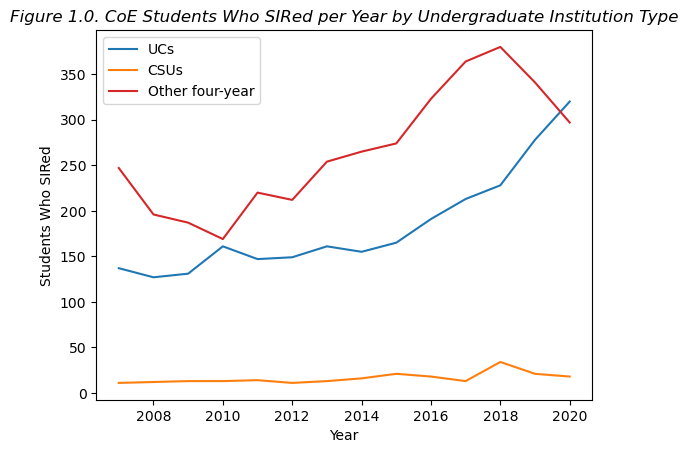

In [20]:
# Figure 1.0. Students Who SIRed per Year by Undergraduate Institution Type
plt.plot(UC_students_per_year[0], UC_students_per_year[1], label='UCs')
plt.plot(CSU_students_per_year[0], CSU_students_per_year[1], label='CSUs')
plt.plot(non_UC_or_CSU_per_year[0], non_UC_or_CSU_per_year[1], color='tab:red', label='Other four-year')

plt.title('Figure 1.0. CoE Students Who SIRed per Year by Undergraduate Institution Type', style='italic')
plt.xlabel('Year')
plt.ylabel('Students Who SIRed')
plt.legend()
plt.show()

From *Figure 1.0* above, it is clear that the number of students admitted who SIRed UC campuses has been on the rise since ~2015 while the number of students who SIRed from CSU campuses has remained stable (and very low). Next, we will disaggregate the dataset to determine the numbers for PhD students and Masters students.

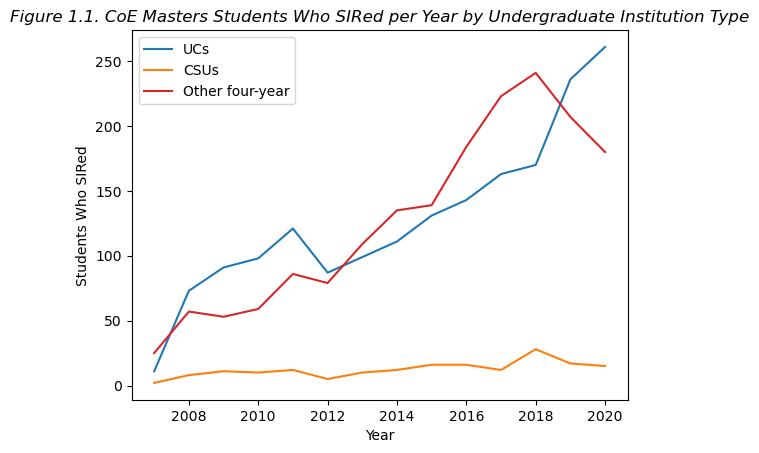

In [21]:
# Figure 1.1. Masters Students Who SIRed per Year by Undergraduate Institution Type
plt.plot(UC_Masters_per_year[0], UC_Masters_per_year[1], label='UCs')
plt.plot(CSU_Masters_per_year[0], CSU_Masters_per_year[1], label='CSUs')
plt.plot(non_UC_or_CSU_Masters_per_year[0], non_UC_or_CSU_Masters_per_year[1], color='tab:red', label='Other four-year')

plt.title('Figure 1.1. CoE Masters Students Who SIRed per Year by Undergraduate Institution Type',
          style='italic')
plt.xlabel('Year')
plt.ylabel('Students Who SIRed')
plt.legend()
plt.show()

From the figure above, it is evident that there has been a dramatic increase in the number of students enrolling in CoE Masters programs. In the last few years (since about 2018) the number of students who SIRed who previously attended UCs 

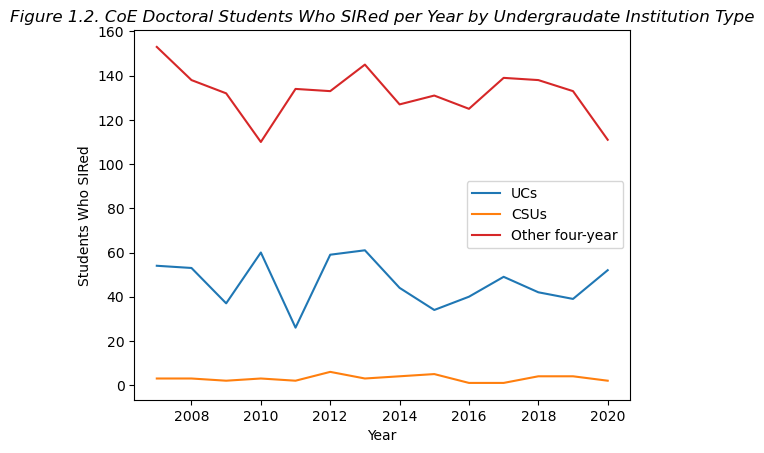

In [22]:
# Figure 1.2. Doctoral Students Who SIRed per Year by Undergraduate Institution Type
plt.plot(UC_PhDs_per_year[0], UC_PhDs_per_year[1], label='UCs')
plt.plot(CSU_PhDs_per_year[0], CSU_PhDs_per_year[1], label='CSUs')
plt.plot(non_UC_or_CSU_PhDs_per_year[0], non_UC_or_CSU_PhDs_per_year[1], color='tab:red', label='Other four-year')

plt.title('Figure 1.2. CoE Doctoral Students Who SIRed per Year by Undergraudate Institution Type',
          style='italic')
plt.xlabel('Year')
plt.ylabel('Students Who SIRed')
plt.legend()
plt.show()

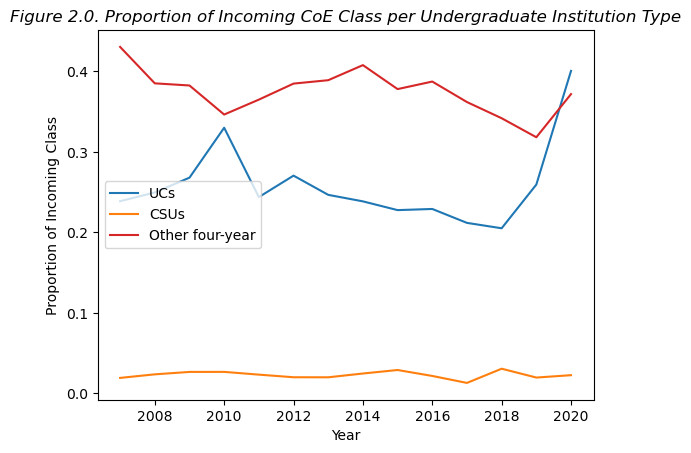

In [23]:
# Figure 2.0. Proportion of Admitted Class per Previous Institution Type
plt.plot(UC_proportions_per_year[0], UC_proportions_per_year[1], label='UCs')
plt.plot(CSU_proportions_per_year[0], CSU_proportions_per_year[1], label='CSUs')
plt.plot(other_four_year_proportions_per_year[0], other_four_year_proportions_per_year[1],
         color='tab:red',
         label='Other four-year')

plt.title('Figure 2.0. Proportion of Incoming CoE Class per Undergraduate Institution Type', style='italic')
plt.xlabel('Year')
plt.ylabel('Proportion of Incoming Class')
plt.legend(loc='center left')
plt.show()

More revealing than looking purely at the number of students who SIRed each year is the proportion of the incoming class comprised by each student group. Despite there being a steady increase in the number of students who SIRed from UC campuses since ~2015 (see *Figure 1*), the proportion of the incoming class from UC campuses did not begin to change as dramatically until ~2018. Noteable, however, is the fact that the proportion of the incoming class from UC campuses surpassed that of students from other four-year institutions for the first time in 2020. Following a similar trend as the one observed in *Figure 1*, the proportion of the admitted class from CSU campuses and CCCs has remained steadily low across the years for which data exists.

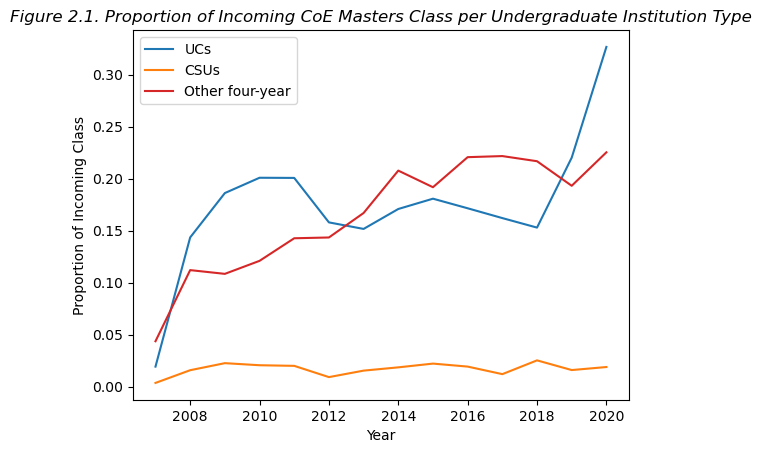

In [24]:
# Figure 2.1. Proportion of Admitted Masters Class per Previous Institution Type
plt.plot(UC_Masters_proportions_per_year[0], UC_Masters_proportions_per_year[1], label='UCs')
plt.plot(CSU_Masters_proportions_per_year[0], CSU_Masters_proportions_per_year[1], label='CSUs')
plt.plot(non_UC_or_CSU_Masters_proportions_per_year[0], non_UC_or_CSU_Masters_proportions_per_year[1],
         color='tab:red',
         label='Other four-year')

plt.title('Figure 2.1. Proportion of Incoming CoE Masters Class per Undergraduate Institution Type', style='italic')
plt.xlabel('Year')
plt.ylabel('Proportion of Incoming Class')
plt.legend(loc='upper left')
plt.show()

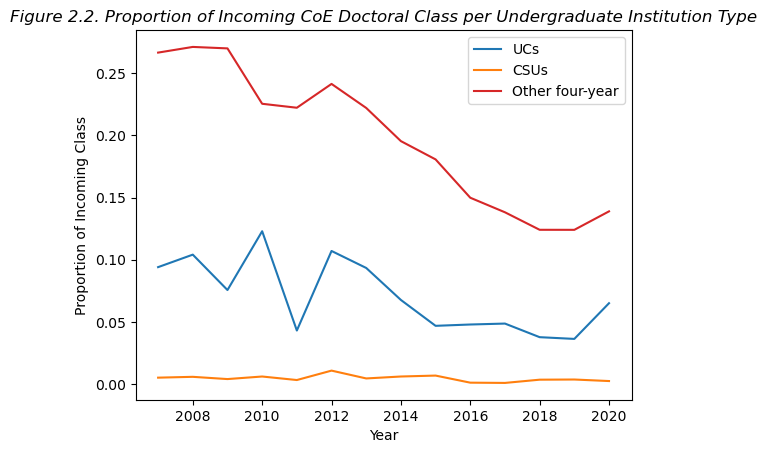

In [25]:
# Figure 2.2. Proportion of Admitted Doctoral Class per Previous Institution Type
plt.plot(UC_PhDs_proportions_per_year[0], UC_PhDs_proportions_per_year[1], label='UCs')
plt.plot(CSU_PhDs_proportions_per_year[0], CSU_PhDs_proportions_per_year[1], label='CSUs')
plt.plot(non_UC_or_CSU_PhDs_proportions_per_year[0], non_UC_or_CSU_PhDs_proportions_per_year[1],
         color='tab:red',
         label='Other four-year')

plt.title('Figure 2.2. Proportion of Incoming CoE Doctoral Class per Undergraduate Institution Type', style='italic')
plt.xlabel('Year')
plt.ylabel('Proportion of Incoming Class')
plt.legend(loc='upper right')
plt.show()

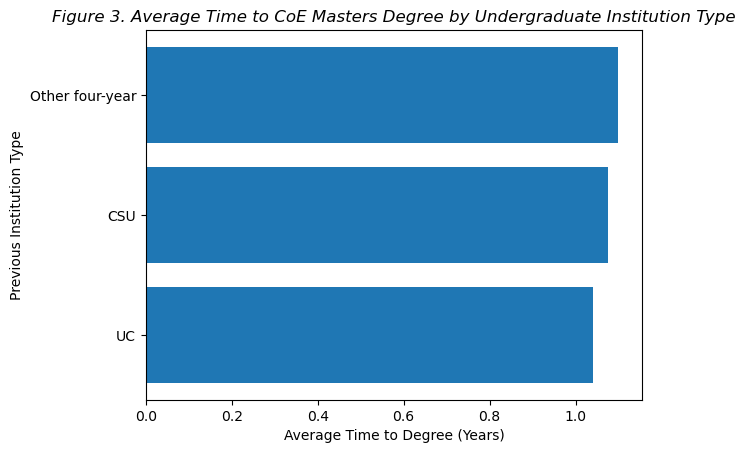

In [32]:
# Figure 3. Average Time to Masters Degree by Undergraduate Institution Type
Masters_TTD = Table().with_columns('Previous Institution Type', make_array('UC', 'CSU', 'Other four-year'),
                                   'Average Time to Degree',
                                   make_array(avg_time_to_graduation(UC_data, 'Masters'),
                                              avg_time_to_graduation(CSU_data, 'Masters'),
                                              avg_time_to_graduation(non_UC_or_CSU_data, 'Masters')
                                             )
                                  )
plt.barh(['UC', 'CSU', 'Other four-year'], width=Masters_TTD[1])
plt.xlabel('Average Time to Degree (Years)')
plt.ylabel('Previous Institution Type')
plt.title('Figure 3. Average Time to CoE Masters Degree by Undergraduate Institution Type', style='italic')
plt.show()

Since the average times to a Masters degree are relatively similar across the three groups, it is difficult to determine precise values from *Figure 3.1*. A summary of the results is provided below:
* Other four-year average time to Masters degree (n = 644): 1.104 years
* CSU average time to Masters degree (n = 80): 1.075 years
* UC average time to Masters degree (n = 746): 1.04 years

Next, we will look at the statistical significance of this relationship.

First, we will consider students who previously attended CSUs and those who previously attended UCs.
* *Null Hypothesis: The time to Masters degree for students who previously attended CSUs is no different than that for those who previously attended UCs. Any difference is due merely to chance.*
* *Alternative Hypothesis: The time to Masters degree for students who previously attended CSUs is different (either longer or shorter) than that for those who previously attended UCs.*

Observed Test Statistic: 0.03478552278820368
P-value: 0.018


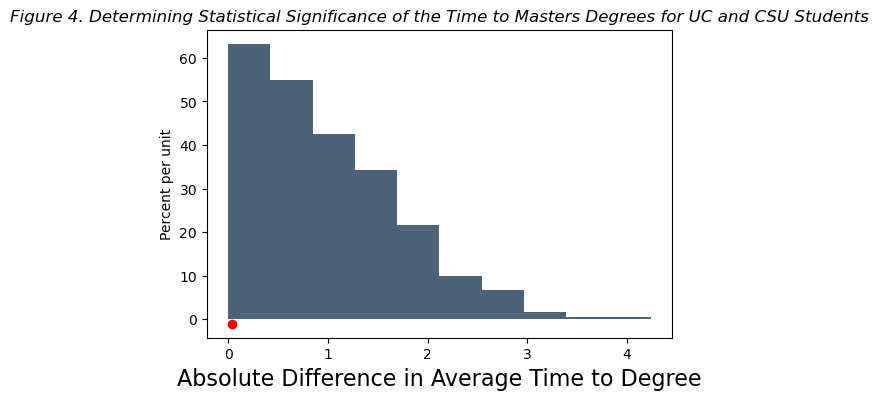

In [41]:
test_stats_array = make_array()

# Observed test statistic
observed_test_stat = abs(avg_time_to_graduation(UC_data, 'Masters', COE_degrees) - avg_time_to_graduation(CSU_data, 'Masters', COE_degrees))

# Bootstrapping
for i in np.arange(1000):
    shuffled_COE_degrees_tags = COE_degrees.sample().column('ppsk')
    new_COE_degrees = COE_degrees.with_column('ppsk', shuffled_COE_degrees_tags)
    one_test_stat = abs(avg_time_to_graduation(UC_data, 'Masters', new_COE_degrees) - avg_time_to_graduation(CSU_data, 'Masters', new_COE_degrees))
    test_stats_array = np.append(test_stats_array, one_test_stat)

# Generating Figure 4. Determining Statistical Significance of the Time to Masters Degrees for UC and CSU Students
stats_table = Table().with_column('Absolute Difference in Average Time to Degree', test_stats_array)
stats_table.hist('Absolute Difference in Average Time to Degree')
plt.scatter(observed_test_stat, -0.01, color='red')
p_value = np.sum(observed_test_stat >= test_stats_array) / len(test_stats_array)
print(f'Observed Test Statistic: {observed_test_stat}')
print(f'P-value: {p_value}')

plt.title('Figure 4. Determining Statistical Significance of the Time to Masters Degrees for UC and CSU Students',
          style='italic')
plt.show()

We now will consider students who previously attended CSUs and those who previously attended other four-year institutions.
* *Null Hypothesis: The time to Masters degree for students who previously attended CSUs is no different than that for those who previously attended other four-year institutions. Any difference is due merely to chance.*
* *Alternative Hypothesis: The time to Masters degree for students who previously attended CSUs is different (either longer or shorter) than that for those who previously attended other four-year institutions.*

Observed Test Statistic: 0.024533437013996906
P-value: 0.011


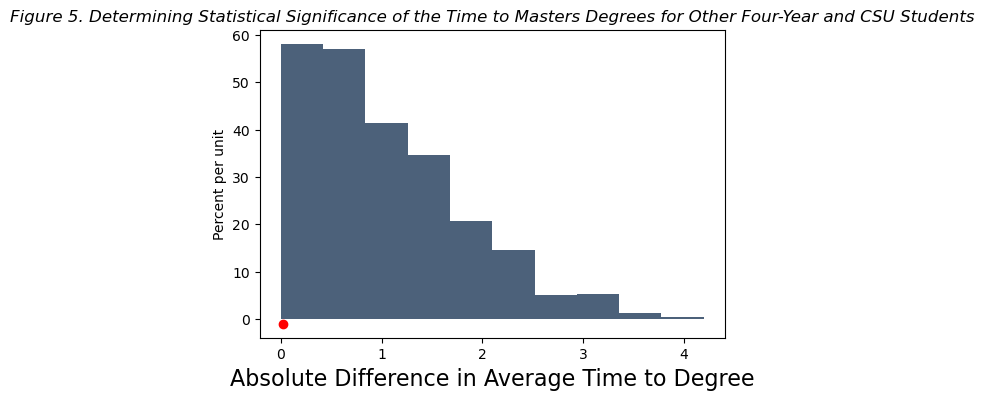

In [42]:
test_stats = make_array()

# Observed Test Statistic
observed_stat = abs(avg_time_to_graduation(non_UC_or_CSU_data, 'Masters', COE_degrees) - avg_time_to_graduation(CSU_data, 'Masters', COE_degrees))

# Bootstrapping
for i in np.arange(1000):
    shuffled_COE_degrees = COE_degrees.sample().column('ppsk')
    COE_degrees_new = COE_degrees.with_column('ppsk', shuffled_COE_degrees)
    one_stat = abs(avg_time_to_graduation(non_UC_or_CSU_data, 'Masters', COE_degrees_new) - avg_time_to_graduation(CSU_data, 'Masters', COE_degrees_new))
    test_stats = np.append(test_stats, one_stat)

# Generating Figure 5. Determining Statistical Significance of the Time to Masters Degrees for Other Four-Year and CSU Students
stats = Table().with_column('Absolute Difference in Average Time to Degree', test_stats)
stats.hist('Absolute Difference in Average Time to Degree')
plt.scatter(observed_stat, -0.01, color='red')
P_value = np.sum(observed_stat >= test_stats) / len(test_stats)
print(f'Observed Test Statistic: {observed_stat}')
print(f'P-value: {P_value}')

plt.title('Figure 5. Determining Statistical Significance of the Time to Masters Degrees for Other Four-Year and CSU Students',
          style='italic')
plt.show()

C:\Users\caleb\anaconda3\lib\site-packages\datascience\tables.py:920: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  values = np.array(tuple(values))


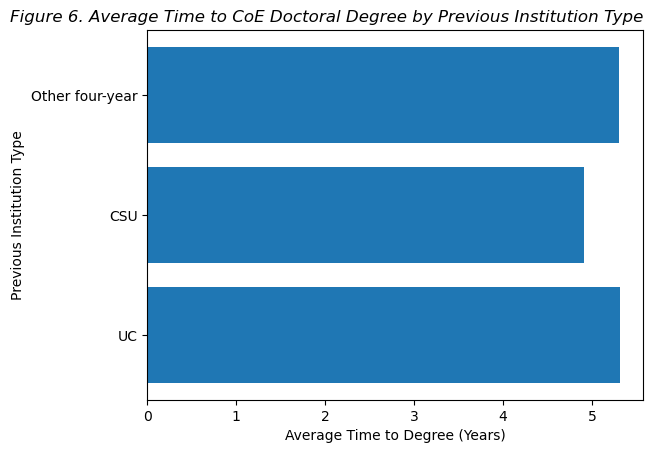

In [31]:
# Figure 6. Average Time to Doctoral Degree by Previous Institution Type
PhD_TTD = Table().with_columns('Previous Institution Type', make_array('UC', 'CSU', 'Other four-year'),
                               'Average Time to Degree',
                               make_array(avg_time_to_graduation(UC_data, 'Doctoral'),
                                          avg_time_to_graduation(CSU_data, 'Doctoral'),
                                          avg_time_to_graduation(non_UC_or_CSU_data, 'Doctoral')
                                         )
                              )
plt.barh(['UC', 'CSU', 'Other four-year'], width=PhD_TTD[1])
plt.xlabel('Average Time to Degree (Years)')
plt.ylabel('Previous Institution Type')
plt.title('Figure 6. Average Time to CoE Doctoral Degree by Previous Institution Type', loc='right', style='italic')
plt.show()

While there is more variation in the average time to Doctoral degrees, it is still difficult to determine the precise values presented in *Figure 6*. A summary of the results is provided below:
* Other four-year average time to Doctoral degree (n = 375): 5.296 years
* CSU average time to Doctoral degree (n = 11): 4.909 years
* UC average time to Doctoral degree (n = 101): 5.317 years

Next, we will look at the statistical significance of this relationship.

As before, we will consider students who previously attended CSUs and those who previously attended UCs.
* *Null Hypothesis: The time to a Doctoral degree (PhD) for students who previously attended CSUs is no different than that for those who previously attended UCs. Any difference is due merely to chance.*
* *Alternative Hypothesis: The time to a Doctoral degree (PhD) for students who previously attended CSUs is different (either longer or shorter) than that for those who previously attended UCs.*

Observed Test Statistic: 0.40340909090909083
P-value: 0.089


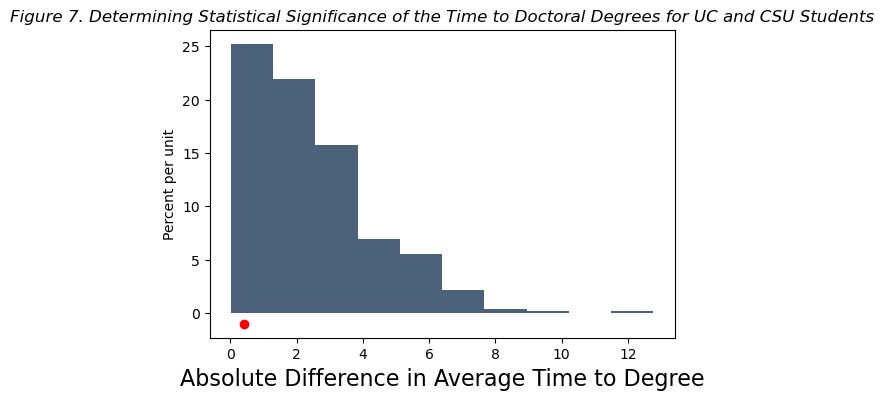

In [43]:
test_stats_array = make_array()

# Observed Test Statistic
observed_test_stat = abs(avg_time_to_graduation(UC_data, 'Doctoral', COE_degrees) - avg_time_to_graduation(CSU_data, 'Doctoral', COE_degrees))

# Bootstrapping
for i in np.arange(1000):
    shuffled_COE_degrees_tags = COE_degrees.sample().column('ppsk')
    new_COE_degrees = COE_degrees.with_column('ppsk', shuffled_COE_degrees_tags)
    one_test_stat = abs(avg_time_to_graduation(UC_data, 'Doctoral', new_COE_degrees) - avg_time_to_graduation(CSU_data, 'Doctoral', new_COE_degrees))
    test_stats_array = np.append(test_stats_array, one_test_stat)

# Generating Figure 7. Determining Statistical Significance of the Time to Doctoral Degrees for UC and CSU Students
stats_table = Table().with_column('Absolute Difference in Average Time to Degree', test_stats_array)
stats_table.hist('Absolute Difference in Average Time to Degree')
plt.scatter(observed_test_stat, -0.01, color='red')
p_value = np.sum(observed_test_stat >= test_stats_array) / len(test_stats_array)
print(f'Observed Test Statistic: {observed_test_stat}')
print(f'P-value: {p_value}')

plt.title('Figure 7. Determining Statistical Significance of the Time to Doctoral Degrees for UC and CSU Students',
          style='italic')
plt.show()

We now will consider students who previously attended CSUs and those who previously attended other four-year institutions.
* *Null Hypothesis: The time to a Doctoral degree (PhD) for students who previously attended CSUs is no different than that for those who previously attended other four-year institutions. Any difference is due merely to chance.*
* *Alternative Hypothesis: The time to a Doctoral degree (PhD) for students who previously attended CSUs is different (either longer or shorter) than that for those who previously attended other four-year institutions.*

Observed Test Statistic: 0.39336140698538546
P-value: 0.108


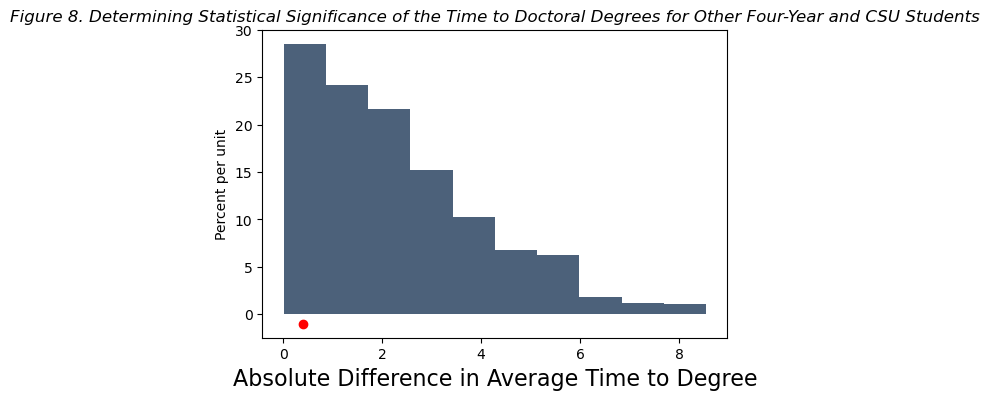

In [33]:
test_stats_array = make_array()

# Observed Test Statistic
observed_test_stat = abs(avg_time_to_graduation(non_UC_or_CSU_data, 'Doctoral', COE_degrees) - avg_time_to_graduation(CSU_data, 'Doctoral', COE_degrees))

# Bootstrapping
for i in np.arange(1000):
    shuffled_COE_degrees_tags = COE_degrees.sample().column('ppsk')
    new_COE_degrees = COE_degrees.with_column('ppsk', shuffled_COE_degrees_tags)
    one_test_stat = abs(avg_time_to_graduation(non_UC_or_CSU_data, 'Doctoral', new_COE_degrees) - avg_time_to_graduation(CSU_data, 'Doctoral', new_COE_degrees))
    test_stats_array = np.append(test_stats_array, one_test_stat)

# Generating Figure 8. Determining Statistical Significance of the Time to Doctoral Degrees for Other Four-Year and CSU Students
stats_table = Table().with_column('Absolute Difference in Average Time to Degree', test_stats_array)
stats_table.hist('Absolute Difference in Average Time to Degree')
plt.scatter(observed_test_stat, -0.01, color='red')
p_value = np.sum(observed_test_stat >= test_stats_array) / len(test_stats_array)
print(f'Observed Test Statistic: {observed_test_stat}')
print(f'P-value: {p_value}')

plt.title('Figure 8. Determining Statistical Significance of the Time to Doctoral Degrees for Other Four-Year and CSU Students',
          style='italic')
plt.show()

# Discussion

From *Figure 2.1*, it can be seen that there is a dramatic increase in the proportion of each incoming College of Engineering Masters degree class comprised by UC students starting with the 2018 incoming class and continuing into the 2020 incoming class. Similarly, there is an increase in the proportion of each incoming Master degree class coming from other four-year institutions beginning with the 2019 incoming class and continuing with the 2020 incoming class although the increase is much less dramatic than that observed for UC students. Finally, the proportion of each incoming class made up of CSU students has remained low and flat across all years for which data was provided.

Similarly, *Figure 2.2* shows many of the same trends. The most dramatic increase is in the proportion of each incoming Doctoral degree class made of UC students (although it is significantly less than that observed in *FIgure 2.1*) and a similar, but less dramatic, increase in the proportion of each incoming class comprised of other four-year students. Likewise, there is also no change in the proportion of students from CSUs, remaining low and flat right for each incoming class from 2007-2020.

Taken together, *Figure 3* and *Figure 6* present data to address the secondary question of this investigation. In *Figure 3*, it can be seen that the average time to Masters degree across the three different undergraduate institution types--each with significant sample size--is comparable (ranging from 1.04 years at the lowest to 1.104 years at the highest). *Figure 6* displays similar trends across the three groups as well. For other four-years students, the average time to Doctoral degree is 5.296 years, for CSU students, the average time to Doctoral degree is ~4.91 years, and for UC students the average time to Doctoral degree is 5.317 years. However, due to the incredibly low sample size of CSU students who earned Doctoral degrees, it is hard to determine the significance of the average time to Doctoral degree for CSU students; the data, though, does seem to indicate that there is some comparability between academic performance between the three groups.

For the correlations presented in *Figure 3* and *Figure 6*, a bootstrap test was conducted to determine statistical significance. Comparing the distributions of students and their average time to a Masters degree, it was determined that the distribution of UC students was no different from that of CSU students (p-value: 0.018) and that the distribution of other four-year students was no different from that of CSU students (p-value: 0.011). The bootstrap tests for each are presented in *Figure 4* and *Figure 5*, respectively. On the other hand, it was not possible to say that the same distributions for Doctoral degrees are the same (see *Figure 7* and *Figure 8*).

# Conclusion

Overall, it is clear that the College of Engineering graduate programs are committed to both increasing greater access to UC Berkeley College of Engineering graduate programs and promoting equitable academic performance between students of various undergraduate institution types. The data has made it clear that there is a growing proportion of UC students in each incoming graduate class, which is indicative of the College of Engineering's committment to promoting greater access to their graduate programs. However, the public higher education infrastructure in California is comprised equally of the UC and CSU systems. As encouraging as an increasing proportion of each incoming graduate class from UCs is, the fact that the proportion of each incoming graduate class from CSUs has not increased is discouraging. That is not to say, however, that more CSU students should be admitted by that fact alone. The data has also made it evident that the average time to both Masters degrees and Doctoral degrees is comparable, suggesting that CSU students do just as well in College of Engineering graduate programs as their peers from UCs and other four-year institutions. The question then becomes why so few CSU students come to UC Berkeley College of Engineering graduate programs. As, it is recommended that the College of Engineering **reanalyze the graduate admissions process to identify barriers to CSU students' admissions** and **restructuring the graduate admissions process in order to ultimately improve CSU students' admissions outcomes**. Potential barriers to CSU students' admissions may range from a mere lack of outreach to these institutions which may prevent students from realizing that these programs exist and that they can succeed in them. However, it is also possible that these barriers are more entrenched in the graduate admissions approach as a whole. If there is some assumption that CSU students are less prepared for graduate programs, it is crucial that these assumptions be brought to light and eliminated. Ultimately, once the barriers to CSU students' admissions are identified, the College of Engineering must work to remove them in the hopes of both improving admissions outcomes for CSU students and creating a more equitable experience for all College of Engineering students.